In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,HTML

import itertools
from sympy import symbols,Eq,nsolve

In [2]:
url='https://www.janestreet.com/puzzles/robot-weightlifting-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
HTML(str(soup.find('div', {'class' :'inner-wrapper'})))

# I missed a couple of things in my orignial entry so didn't get this one. Solution below has the benefit of 
# both the published solution and other online explains.

In [3]:
# work out the probability of Seed 1 winning. He has 3 options
def last_win(x,y):
    c = (1-x)*(1-y)                              # automatically lift zero if x & y fail     
    a = x/(1-(1-x)**2*(1-y))                     # try to lift x 
    b = (1-x)*y/(1-(1-x)*(1-y)**2)               # try to lift y                                 
        
    return np.argmax([a,b,c])

In [4]:
#graph this out to see the 3 regimes
N =1000
x = np.arange(1,N)
y = np.arange(1,N)

z = np.zeros((N-1,N-1))
for a,b in itertools.product(x,y):
    z[b-1,a-1] = last_win(a/N,b/N)

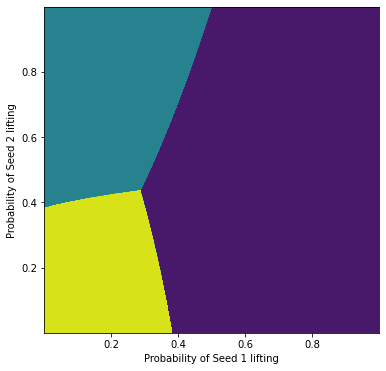

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(x/N,y/N,z)
plt.xlabel('Probability of Seed 1 lifting')
plt.ylabel('Probability of Seed 2 lifting')
plt.plot()
plt.show()

In [6]:
# Seed 2 will choose the point on the graph where they maximise their probability of winning 
# which is the intersection of the 3 areas 
# best summary of why is here https://joshmaxsilverman.github.io/2021-07-21-robot-weightlifters/

x,y = symbols("x y")

# Third player choices
a = x/(1-(1-x)**2*(1-y))                     # try to lift x 
b = (1-x)*y/(1-(1-x)*(1-y)**2)               # try to lift y 
c = (1-x)*(1-y)                              # automatically lift zero if x & y fail

sol=nsolve([Eq(a,b),Eq(a,c),Eq(b,c)],(x,y),[0.3,0.4])
print("Solution is: {:.6f}".format(sol[0]))

Solution is: 0.286833


In [7]:
url='https://www.janestreet.com/puzzles/robot-weightlifting-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))

<img src='https://www.janestreet.com/puzzles/2021-06-01-robot-weightlifting-solution.jpg' width=400>